# 2. 데이터 탐색

- 2.1 데이터셋 다운로드
- 2.2 데이터셋 확인
- 2.3 subplots를 활용한 시각화

In [1]:
!git clone https://github.com/Pseudo-Lab/Tutorial-Book-Utils
!python Tutorial-Book-Utils/PL_data_loader.py --data GAN-Colorization
!unzip -q Victorian400-GAN-colorization-data.zip

Cloning into 'Tutorial-Book-Utils'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 27 (delta 7), reused 13 (delta 3), pack-reused 0
Unpacking objects: 100% (27/27), done.
Victorian400-GAN-colorization-data.zip is done!


In this tutorial we will learn how to use `subplots`. When you want to display several images on one output cell, you can use `subplots` method provided in `matplotlib.pyplot` module. We will first import several libraries that we will need in this tutorial. 

In [ ]:
import os
import glob
import matplotlib.pyplot as plt
import cv2

Next, we will check number of files in each directory. 

In [ ]:
data_dir = '../input/victorian400/'

origin_dir = data_dir + 'original/'
resized_dir = data_dir + 'resized/'
gray_dir = data_dir + 'gray/'

print(len(os.listdir(origin_dir)))
print(len(os.listdir(resized_dir)))
print(len(os.listdir(gray_dir)))

400
400
400


There are 400 images in each directory. `original` folder contains original images, `resized` folder contains images that have been resized to 256 x 256, `gray` folder contains black and white version of `resized` images. 

In the next cell, we will save the file path of each image to the corresponding variables. Files in `origin` folder will be saved to `origin_files`, files in `resized` folder will be saved to `resized_files`, and files in `gray` folder will be saved to `gray_files`. 

In [ ]:
origin_files = sorted(glob.glob(origin_dir + '*'))
resized_files = sorted(glob.glob(resized_dir + '*'))
gray_files = sorted(glob.glob(gray_dir + '*'))

Let's check if the paths have been saved correctly. 

In [ ]:
print(origin_files[:2])

print(resized_files[:2])

print(gray_files[:2])

['../input/victorian400/original/Victorian1.png', '../input/victorian400/original/Victorian10.png']
['../input/victorian400/resized/Victorian1.png', '../input/victorian400/resized/Victorian10.png']
['../input/victorian400/gray/Victorian1.png', '../input/victorian400/gray/Victorian10.png']


All files have been saved to the corresponding variable. Next, we will read and plot one image from each `files` variable to see what the image looks like. 

../input/victorian400/original/Victorian1.png
(714, 750, 3)


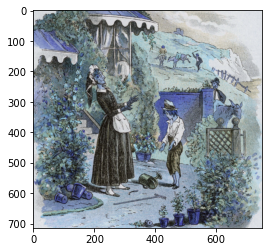

In [ ]:
#cv2.imread to read as an array and plt.imshow to show the array as an image

img_arr = cv2.imread(origin_files[0])

print(origin_files[0])

print(img_arr.shape)

plt.imshow(img_arr)

`Victorian1.png` in `original` folder is a colored image in 714 x 750 shape.

../input/victorian400/resized/Victorian1.png
(256, 256, 3)


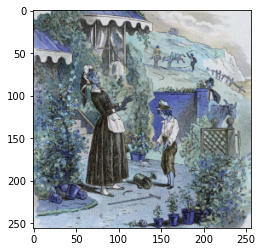

In [ ]:
img_arr = cv2.imread(resized_files[0])

print(resized_files[0])

print(img_arr.shape)

plt.imshow(img_arr)

`Victorian1.png` in `resized` folder is a colored image in 256 x 256 shape.

../input/victorian400/gray/Victorian1.png
(256, 256, 3)


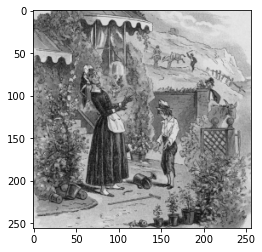

In [ ]:
img_arr = cv2.imread(gray_files[0])

print(gray_files[0])

print(img_arr.shape)

plt.imshow(img_arr)

Lastly, `Victorian1.png` in `gray` folder is a black and white image in 256 x 256 shape.

We have compared each image from each directories. However, since we have plotted one image on each output cell, it's difficult to look at all images at once. This is when `subplots` come in handy. By using `subplots`, we can plot multiple images on one output cell so it is much easier to look at compare multiple images. 

We will first read 5 images from each `files` folder consecutively and save them to `img_arrs`.

In [ ]:
img_arrs = []

img_num = 5

for idx in range(img_num):
    
    img_arrs.append(cv2.imread(origin_files[idx]))
    img_arrs.append(cv2.imread(resized_files[idx]))
    img_arrs.append(cv2.imread(gray_files[idx]))

In [ ]:
len(img_arrs)

15

We have read 5 images from each of the 3 folders, so there are 15 images saved in `img_arrs` variable.

Now we will use `subplots` to display 15 images in one output cell. We will configure 3 parameters in `plt.subplots()`.

- `nrows`: number of rows to display
- `ncols`: number of columns to display
- `figsize`: figure size of each image

Since we have 15 images in `img_arrs`, we will create a subplot with 5 rows and 3 columns. Each row will correspond to a certain image. (ex. `Victorian1.png`), Each column will correspond to each folder from `original` to `gray`. Let's execute the code below and see the result. 

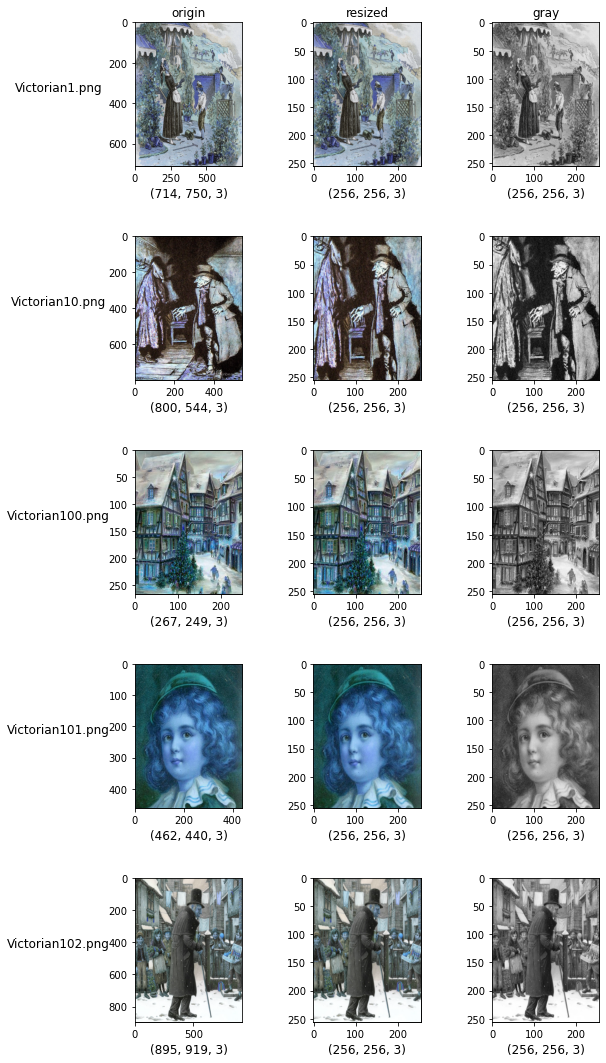

In [ ]:
rows = img_num
columns = 3

fig, axes = plt.subplots(nrows=rows, ncols=columns, figsize=(columns*3, rows*3))

for num in range(1, rows*columns+1):
    
    fig.add_subplot(rows, columns, num)
    
    idx = num - 1
    
    plt.imshow(img_arrs[idx], aspect='auto')
    plt.xlabel(f'{img_arrs[idx].shape}', fontsize=12)
    
    if num % 3 == 1 : #if remainder is 1
        file_idx = num // 3 # get quotient
        plt.ylabel(f'{sorted(os.listdir(origin_dir))[file_idx]}', 
                  rotation=0,
                  fontsize=12,
                  labelpad=50) #add space between ylabel and yaxis
    
    
fig.tight_layout() # used to adjust padding between subplots 

cols = ['origin', 'resized', 'gray']

for ax, col in zip(axes[0], cols):
    ax.set_title(col)

for idx, ax in enumerate(axes.flat):
    ax.set_xticks([])
    ax.set_yticks([])
    



`plt.subplots()` creates a grid that is shaped as `nrows` x `ncols`. We have created a grid with 5 rows and 3 columns. Each grid cell has it's own number. The numbers range from 1 to 15 and they are given from left to right. First row's cells are numbered as 1, 2, 3 from left to right and second row's cells are numbered as 4, 5, 6 and so on. 

In order to plot an image on each cells in the grid, use `add_subplot()` to select the cell you want to plot on. Then use `plt.imshow()` to plot an image on the selected cell. I have additionally added labels on x-axis to show the shape of the drawn image. Also added y-axis label to the images on the first column to show the file name of the image. 

First column has all the images from `origin` folder, second column has all the images from `resized` folder, and third colum has all the images from `gray` folder. Each image has it's shape printed on the bottom. We can observe that images from `origin` folder have different shapes. However, all images from `resized` folder have equal shape in 256 x 256. Also, all images in `gray` folder are black and white. 

### References

https://stackoverflow.com/questions/47282918/clearing-a-subplot-in-matplotlib

https://stackoverflow.com/questions/25812255/row-and-column-headers-in-matplotlibs-subplots

https://stackoverflow.com/questions/25124143/matplotlib-subplots-get-rid-of-tick-labels-altogether

https://stackoverflow.com/questions/12806481/matplotlib-imshow-stretch-to-fit-width